In [34]:
# 我们着重讨论不同区域的显著性影响因素
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
data = pd.read_csv("F:/project/Big-Data-Analytics-and-Visualization/Visualization/data_cleaned.csv")
data.describe()

,Lng,Lat,Cid,followers,attractiveness,livingRoom,drawingRoom,kitchen,bathRoom,floor,...,renovationCondition,buildingStructure,ladderRatio,elevator,subway,district,communityAverage,tradeTimeModefiy,Original_price,Original_followers
count,297597.000000,297597.000000,2.975970e+05,297597.000000,297597.000000,297597.000000,297597.000000,297597.000000,297597.000000,297597.000000,...,297597.000000,297597.000000,297597.000000,297597.000000,297597.000000,297597.000000,297597.000000,297597.000000,297597.000000,297597.000000
mean,116.418767,39.949761,1.126275e+12,0.015039,0.391045,2.011102,1.171107,0.995131,1.182351,13.165916,...,2.616461,4.421473,0.381856,0.570624,0.602388,6.748516,63696.710585,735621.421896,42715.008611,17.189713
std,0.110999,0.091533,1.331619e+12,0.030417,0.178332,0.764922,0.512581,0.100335,0.423099,7.764060,...,1.306988,1.907456,0.176411,0.494988,0.489405,2.811945,22153.499402,597.390522,19476.512214,34.766471
min,116.072514,39.627030,1.111030e+12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,0.014000,0.000000,0.000000,1.000000,10847.000000,734046.000000,7.000000,0.000000
25%,116.345863,39.893200,1.111030e+12,0.000000,0.258747,1.000000,1.000000,1.000000,1.000000,6.000000,...,1.000000,2.000000,0.250000,0.000000,0.000000,6.000000,46505.000000,735124.000000,28266.000000,0.000000
50%,116.416780,39.934530,1.111030e+12,0.004374,0.357607,2.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,6.000000,0.333000,1.000000,1.000000,7.000000,59025.000000,735769.000000,39063.000000,5.000000
75%,116.476921,40.003156,1.111030e+12,0.016623,0.485556,2.000000,1.000000,1.000000,1.000000,19.000000,...,4.000000,6.000000,0.500000,1.000000,1.000000,8.000000,75858.000000,736091.000000,53037.000000,19.000000
max,116.711337,40.252758,1.184870e+14,1.000000,1.000000,8.000000,5.000000,3.000000,7.000000,63.000000,...,4.000000,6.000000,5.000000,1.000000,1.000000,13.000000,183109.000000,736628.000000,109222.000000,1143.000000


In [36]:
data.shape

(297597, 23)

In [37]:
data['totalRoom'] = data['livingRoom'] + data['drawingRoom'] + data['kitchen'] + data['bathRoom']
data['houseAge'] = data['tradeTimeModefiy']//365 - data['constructionTime']
data['houseCondition'] = data['renovationCondition'] + data['subway'] + data['elevator'] 

In [38]:
import folium
# 创建地图对象，设置初始位置和缩放级别
m = folium.Map(location=[39.906217, 116.3912757], zoom_start=13)
# 在地图上添加一个标记点
folium.Marker([39.906217, 116.3912757], popup='Beijing').add_to(m)
display(m)

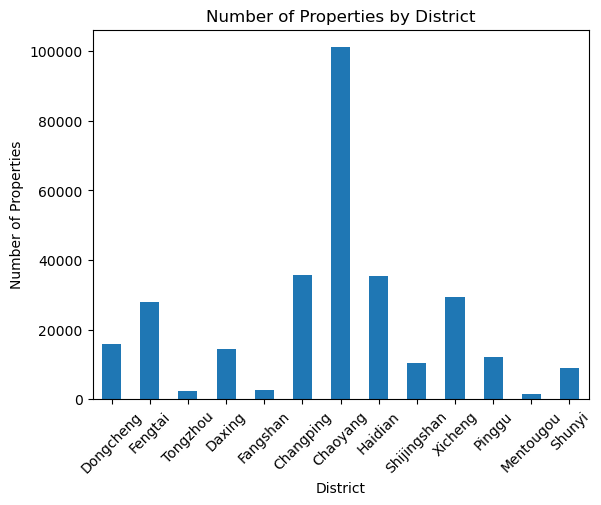

In [39]:
# 对district进行分组并计算每个区域的样本个数
district_counts = data.groupby('district').size()
# 绘制柱状图
district_counts.plot(kind='bar')

plt.xlabel('District')
plt.ylabel('Number of Properties')
plt.title('Number of Properties by District')
plt.xticks(range(len(district_counts)), ['Dongcheng', 'Fengtai', 'Tongzhou', 'Daxing', 'Fangshan', 'Changping', 'Chaoyang', 'Haidian', 'Shijingshan', 'Xicheng', 'Pinggu', 'Mentougou', 'Shunyi'], rotation=45)
plt.show()

In [40]:
# 我们分区块研究影响房价的显著因素
# 东城区
from folium.plugins import MarkerCluster
Fangshan_data = data[data['district'] == 5]
map_center = [Fangshan_data.iloc[0]['Lat'], Fangshan_data.iloc[0]['Lng']]
m = folium.Map(location=map_center, zoom_start=12)
# 创建一个 MarkerCluster 对象
marker_cluster = MarkerCluster().add_to(m)
# 遍历为每个点添加标记到 MarkerCluster 中，而不是直接添加到地图上
for index, row in Fangshan_data.iterrows():
    folium.Marker([row['Lat'], row['Lng']]).add_to(marker_cluster)
display(m)

In [41]:
from folium.plugins import HeatMap
# 东城区
# 我们先观察房屋价格在地理空间中的分布情况
map_center = [Fangshan_data.iloc[0]['Lat']-0.03, Fangshan_data.iloc[0]['Lng']]
m = folium.Map(location=map_center, zoom_start=12)
# 权重设置为每个点的price
heat_data = [[row['Lat'], row['Lng'], row['attractiveness']] for index, row in Fangshan_data.iterrows()]
# 创建热度图并添加到地图上，使用price作为权重
HeatMap(heat_data,blur=4, radius=8).add_to(m)
m

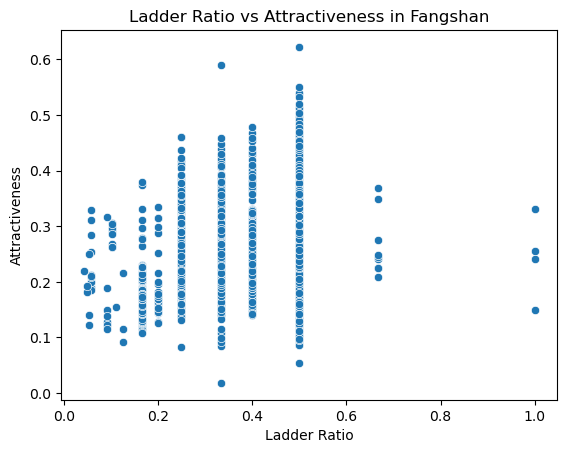

In [42]:
# 我们在东城区的范围内研究房价的显著影响因素
# 东城区
import seaborn as sns
# 使用Seaborn绘制ladderRatio与attarctiveness的关系
sns.scatterplot(data=Fangshan_data, x='ladderRatio', y='attractiveness')
plt.title('Ladder Ratio vs Attractiveness in Fangshan')
plt.xlabel('Ladder Ratio')
plt.ylabel('Attractiveness')
plt.show()

In [43]:
# 计算ladderRatio和attractiveness之间的相关系数
correlation_matrix = Fangshan_data[['ladderRatio', 'attractiveness']].corr()
# 打印相关系数矩阵
print(correlation_matrix)
# 从相关系数的角度看一般条件下ladderRatio在东城区不是一个显著影响房屋吸引力的因素

                ladderRatio  attractiveness
ladderRatio         1.00000         0.21871
attractiveness      0.21871         1.00000


In [44]:
# 我们再观察东城区的房价与楼层高度的关系
high_floor = Fangshan_data[Fangshan_data['floor'] > 10]
low_floor = Fangshan_data[Fangshan_data['floor'] <= 10]
print("东城区高层建筑共{high_floor}个，低层建筑共{low_floor}个,高层建筑占比为{high_floor_ratio:.2f}%".format(high_floor=len(high_floor), low_floor=len(low_floor), high_floor_ratio=len(high_floor)/len(Fangshan_data)*100))

东城区高层建筑共1934个，低层建筑共689个,高层建筑占比为73.73%


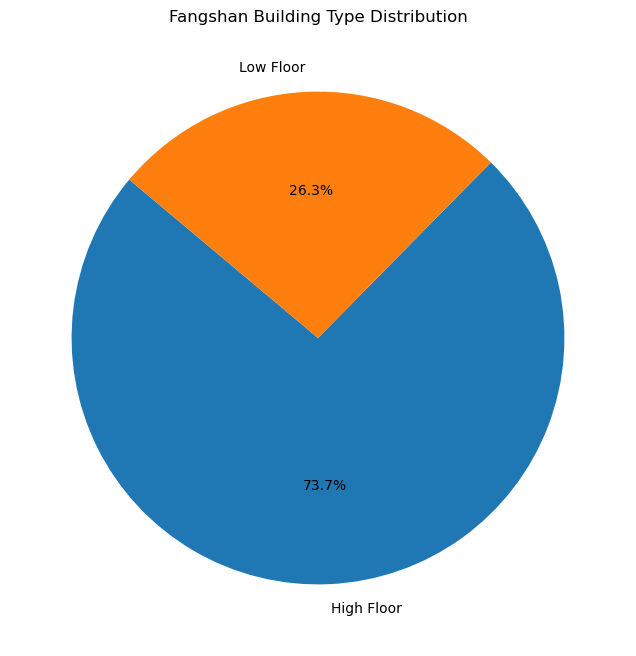

In [45]:
# 绘制饼图
plt.figure(figsize=(8, 8))
plt.pie([len(high_floor), len(low_floor)], labels=['High Floor', 'Low Floor'], autopct='%1.1f%%', startangle=140)
plt.title('Fangshan Building Type Distribution')
plt.show()

In [46]:
# 计算floor和attractivness之间的相关系数
correlation_matrix = Fangshan_data[['floor', 'attractiveness']].corr()
print(correlation_matrix)

                   floor  attractiveness
floor           1.000000        0.271394
attractiveness  0.271394        1.000000


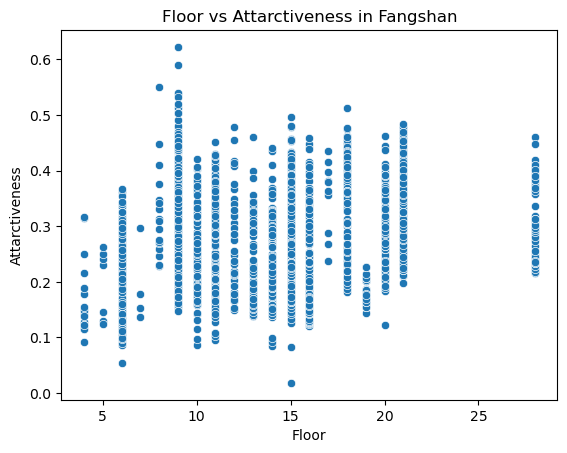

In [47]:
# 我们在东城区的范围内研究房价的显著影响因素
# 东城区
# 使用Seaborn绘制ladderRatio与attarctiveness的关系
sns.scatterplot(data=Fangshan_data, x='floor', y='attractiveness')
plt.title('Floor vs Attarctiveness in Fangshan')
plt.xlabel('Floor')
plt.ylabel('Attarctiveness')
plt.show()

In [48]:
# 发现在东城区中整体上floor和房屋的受欢迎程度没有关联
# 计算在高层条件下ladderRatio和attractiveness之间的相关系数
correlation_matrix = high_floor[['ladderRatio', 'attractiveness']].corr()
print(correlation_matrix)

                ladderRatio  attractiveness
ladderRatio         1.00000         0.28441
attractiveness      0.28441         1.00000


In [49]:
correlation_matrix = low_floor[['ladderRatio', 'attractiveness']].corr()
print(correlation_matrix)
# 对于低层建筑, ladderRatio和attractiveness之间的关联性相较于高层建筑要更弱,虽然面对高层建筑时人们会考虑人均楼梯数目但总体来说不显著

                ladderRatio  attractiveness
ladderRatio        1.000000        0.133001
attractiveness     0.133001        1.000000


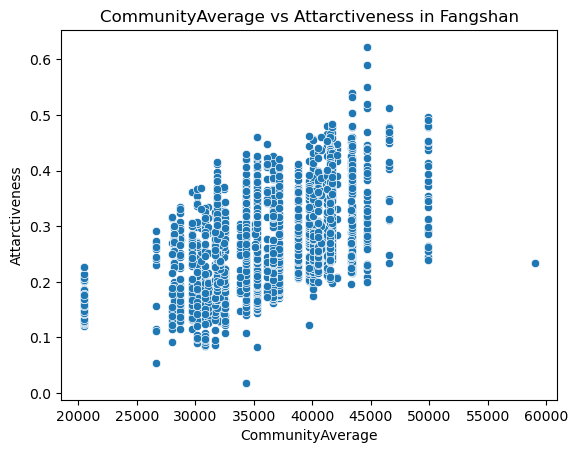

In [50]:
sns.scatterplot(data=Fangshan_data, x='communityAverage', y='attractiveness')
plt.title('CommunityAverage vs Attarctiveness in Fangshan')
plt.xlabel('CommunityAverage')
plt.ylabel('Attarctiveness')
plt.show()

In [51]:
# 研究communityAverage与attractiveness之间的关联度
correlation_matrix = Fangshan_data[['communityAverage', 'attractiveness']].corr()
print(correlation_matrix)

                  communityAverage  attractiveness
communityAverage          1.000000        0.552847
attractiveness            0.552847        1.000000


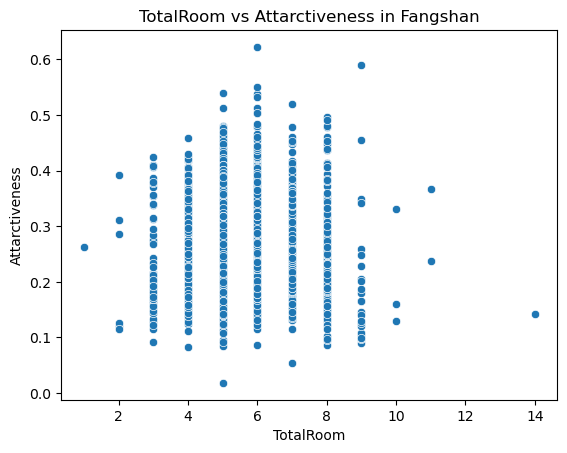

In [52]:
sns.scatterplot(data=Fangshan_data, x='totalRoom', y='attractiveness')
plt.title('TotalRoom vs Attarctiveness in Fangshan')
plt.xlabel('TotalRoom')
plt.ylabel('Attarctiveness')
plt.show()

In [53]:
# 研究totalRoom与attractiveness之间的关联度
correlation_matrix = Fangshan_data[['totalRoom', 'attractiveness']].corr()
print(correlation_matrix)

                totalRoom  attractiveness
totalRoom        1.000000       -0.006723
attractiveness  -0.006723        1.000000


In [54]:
# 研究totalRoom与attractiveness之间的关联度
correlation_matrix = Fangshan_data[['totalRoom', 'attractiveness']].corr()
print(correlation_matrix)

                totalRoom  attractiveness
totalRoom        1.000000       -0.006723
attractiveness  -0.006723        1.000000


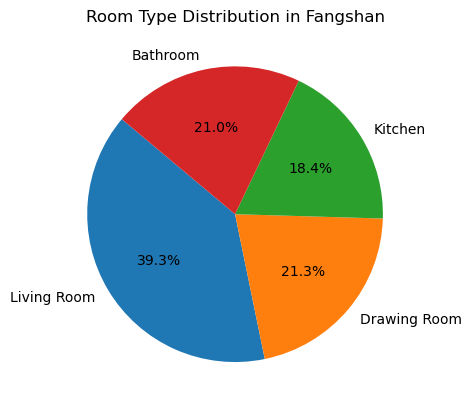

In [55]:
# 分别计算每种房间的总数
total_livingRoom = Fangshan_data['livingRoom'].sum()
total_drawingRoom = Fangshan_data['drawingRoom'].sum()
total_kitchen = Fangshan_data['kitchen'].sum()
total_bathroom = Fangshan_data['bathRoom'].sum()
# 将计算结果合并为一个新的Series
room_totals = pd.Series({
    'Living Room': total_livingRoom,
    'Drawing Room': total_drawingRoom,
    'Kitchen': total_kitchen,
    'Bathroom': total_bathroom
})
room_totals.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Room Type Distribution in Fangshan')
plt.ylabel('')
plt.show()

In [56]:
# 我们从一般的角度出发研究房间类型对吸引力的影响
correlation_matrix = Fangshan_data[['bathRoom','kitchen','drawingRoom','livingRoom' ,'attractiveness']].corr()
print(correlation_matrix)

                bathRoom   kitchen  drawingRoom  livingRoom  attractiveness
bathRoom        1.000000  0.075717     0.435579    0.437319       -0.063942
kitchen         0.075717  1.000000     0.150667    0.128665       -0.003774
drawingRoom     0.435579  0.150667     1.000000    0.435997       -0.074943
livingRoom      0.437319  0.128665     0.435997    1.000000        0.071865
attractiveness -0.063942 -0.003774    -0.074943    0.071865        1.000000


In [57]:
big_family = Fangshan_data[Fangshan_data['livingRoom'] >= 3]
# 我们再进一步研究大的家庭对不同种类房间的需求
correlation_matrix = big_family[['bathRoom','kitchen','drawingRoom', 'attractiveness']].corr()
print(correlation_matrix)

                bathRoom   kitchen  drawingRoom  attractiveness
bathRoom        1.000000  0.064961     0.535026       -0.184651
kitchen         0.064961  1.000000     0.101593       -0.058407
drawingRoom     0.535026  0.101593     1.000000       -0.224691
attractiveness -0.184651 -0.058407    -0.224691        1.000000


In [58]:
small_family = Fangshan_data[Fangshan_data['livingRoom'] < 3]
correlation_matrix = small_family[['bathRoom','kitchen','drawingRoom', 'attractiveness']].corr()
print(correlation_matrix)

                bathRoom   kitchen  drawingRoom  attractiveness
bathRoom        1.000000  0.046571     0.162861       -0.012899
kitchen         0.046571  1.000000     0.156312        0.018694
drawingRoom     0.162861  0.156312     1.000000       -0.026399
attractiveness -0.012899  0.018694    -0.026399        1.000000


In [59]:
# 交易时房龄对吸引力的影响
correlation_matrix = Fangshan_data[['constructionTime','houseAge','attractiveness']].corr()
print(correlation_matrix)

                  constructionTime  houseAge  attractiveness
constructionTime          1.000000 -0.981486        0.382894
houseAge                 -0.981486  1.000000       -0.254521
attractiveness            0.382894 -0.254521        1.000000


In [60]:
correlation_matrix = Fangshan_data[['houseCondition','houseAge','constructionTime','attractiveness']].corr()
print(correlation_matrix)

                  houseCondition  houseAge  constructionTime  attractiveness
houseCondition          1.000000 -0.233053          0.250866        0.258109
houseAge               -0.233053  1.000000         -0.981486       -0.254521
constructionTime        0.250866 -0.981486          1.000000        0.382894
attractiveness          0.258109 -0.254521          0.382894        1.000000


In [61]:
correlation_matrix = high_floor[['elevator','attractiveness']].corr()
print(correlation_matrix)

                elevator  attractiveness
elevator        1.000000       -0.035813
attractiveness -0.035813        1.000000


C:\Users\58341\AppData\Local\Temp\ipykernel_2728\1119889605.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fangshan_data['buildingType'] = Fangshan_data['buildingType'].map(type_mapping)


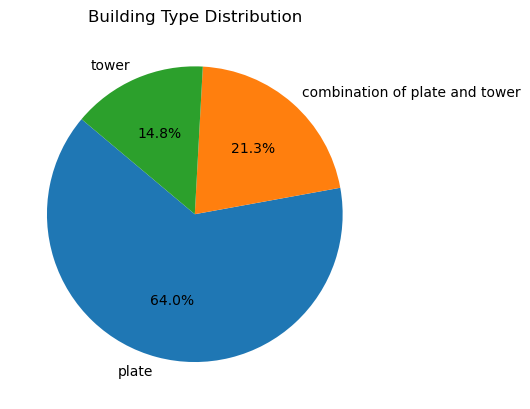

In [62]:
type_mapping = {
    1: 'tower',
    2: 'bungalow',
    3: 'combination of plate and tower',
    4: 'plate'
}
Fangshan_data['buildingType'] = Fangshan_data['buildingType'].map(type_mapping)
building_type_counts = Fangshan_data['buildingType'].value_counts()
building_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Building Type Distribution')
plt.ylabel('')
plt.show()

buildingType
combination of plate and tower    0.270791
plate                             0.263759
tower                             0.234020
Name: attractiveness, dtype: float64


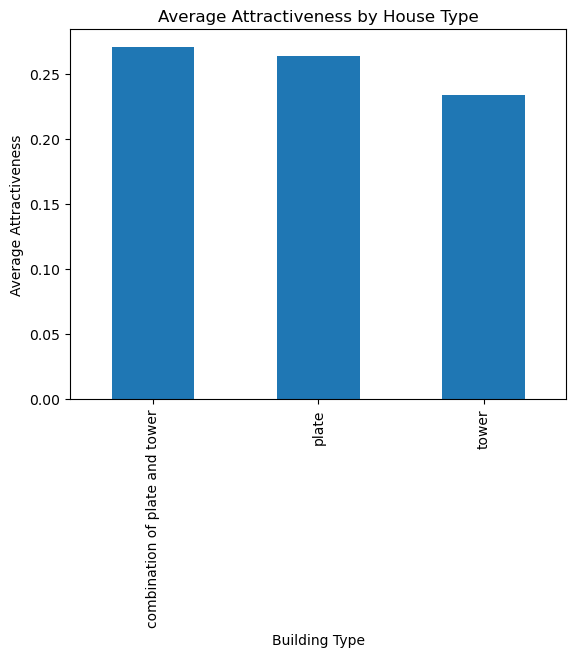

In [63]:
# 计算每种房屋建筑结构类型的attractiveness平均值
attractiveness_avg = Fangshan_data.groupby('buildingType')['attractiveness'].mean().sort_values(ascending=False)
print(attractiveness_avg)
attractiveness_avg.plot(kind='bar')
plt.title('Average Attractiveness by House Type')
plt.xlabel('Building Type')
plt.ylabel('Average Attractiveness')
plt.show()

In [64]:
Fangshan_data= Fangshan_data[Fangshan_data['buildingStructure']!=1]
Fangshan_data['buildingStructure']

16633     2
40834     2
51110     2
85865     6
111928    6
         ..
297351    6
297365    6
297397    6
297484    6
297549    6
Name: buildingStructure, Length: 2617, dtype: int64

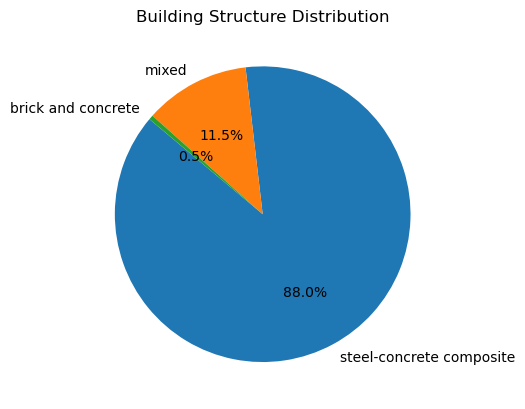

In [65]:
type_mapping = {
    2:"mixed",
    3:"brick and wood", 
    4:"brick and concrete", 
    5:"steel", 
    6:"steel-concrete composite"
}
Fangshan_data['buildingStructure'] = Fangshan_data['buildingStructure'].map(type_mapping)
building_type_counts = Fangshan_data['buildingStructure'].value_counts()
explode_values = (0, 0, 0.3, 0.2, 0.1)
building_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Building Structure Distribution')
plt.ylabel('')
plt.show()

buildingStructure
steel-concrete composite    0.268610
brick and concrete          0.232504
mixed                       0.204145
Name: attractiveness, dtype: float64


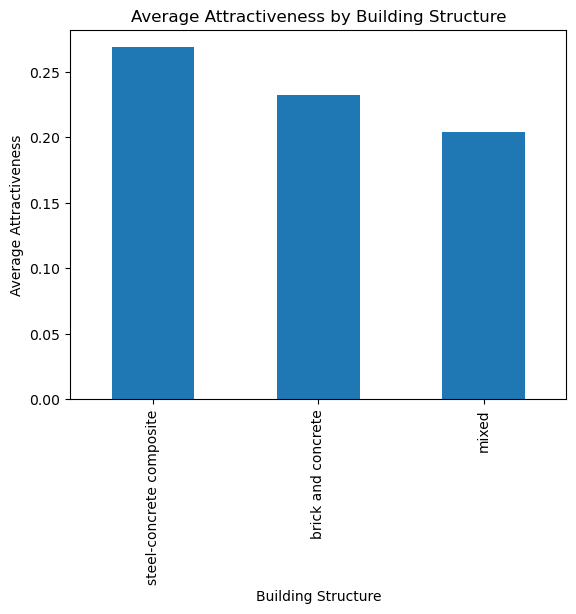

In [66]:
# 计算每种房屋建筑结构类型的attractiveness平均值
attractiveness_avg = Fangshan_data.groupby('buildingStructure')['attractiveness'].mean().sort_values(ascending=False)
print(attractiveness_avg)
attractiveness_avg.plot(kind='bar')
plt.title('Average Attractiveness by Building Structure')
plt.xlabel('Building Structure')
plt.ylabel('Average Attractiveness')
plt.show()